In [1]:
pwd

In [2]:
# This study is aimed at comparing accuracy of predicted RandomForestRegressor using PCA & FULL_Features datasets.
# This is an exploratory data analysis on the House Prices Kaggle Competition found at https://www.kaggle.com/c/house-prices-advanced-regression-techniques
# Henry Nwachukwu Project 3 Date submitted: 02:03:2020 ERP COLLEGE....

# for simplicity of this study, the 'final_data_combined' will be used instead of the original numerical and categorical data to safe time: it should be noted that in real scenario this is not a good practise.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.decomposition import PCA

In [4]:
# import data for study
data = pd.read_csv("final_data_combined.csv")

In [5]:
data.head()

,MSZoning_FV,MSZoning_RL,Alley_None,Alley_Pave,LotShape_IR2,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MiscVal,MoSold,YrSold,SalePrice_log
0,0,1,1,0,0,1,0,0,1,0,...,0.311725,0.351000,-0.752176,0.216503,-0.359325,-0.270208,-0.087688,-1.599111,0.138777,12.247694
1,0,1,1,0,0,1,0,0,1,0,...,0.311725,-0.060731,1.626195,-0.704483,-0.359325,-0.270208,-0.087688,-0.489110,-0.614439,12.109011
2,0,1,1,0,0,0,0,0,1,0,...,0.311725,0.631726,-0.752176,-0.070361,-0.359325,-0.270208,-0.087688,0.990891,0.138777,12.317167
3,0,1,1,0,0,0,0,0,1,0,...,1.650307,0.790804,-0.752176,-0.176048,4.092524,-0.270208,-0.087688,-1.599111,-1.367655,11.849398
4,0,1,1,0,0,0,0,0,1,0,...,1.650307,1.698485,0.780197,0.563760,-0.359325,-0.270208,-0.087688,2.100892,0.138777,12.429216


In [6]:
target = data.iloc[:,-1]

In [7]:
target

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice_log, Length: 1460, dtype: float64

In [8]:
data_pca = data.drop(['SalePrice_log'],axis=1)

In [9]:
data_pca.head()

,MSZoning_FV,MSZoning_RL,Alley_None,Alley_Pave,LotShape_IR2,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,...,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MiscVal,MoSold,YrSold
0,0,1,1,0,0,1,0,0,1,0,...,1.021157,0.311725,0.351000,-0.752176,0.216503,-0.359325,-0.270208,-0.087688,-1.599111,0.138777
1,0,1,1,0,0,1,0,0,1,0,...,-0.104483,0.311725,-0.060731,1.626195,-0.704483,-0.359325,-0.270208,-0.087688,-0.489110,-0.614439
2,0,1,1,0,0,0,0,0,1,0,...,0.937776,0.311725,0.631726,-0.752176,-0.070361,-0.359325,-0.270208,-0.087688,0.990891,0.138777
3,0,1,1,0,0,0,0,0,1,0,...,0.812705,1.650307,0.790804,-0.752176,-0.176048,4.092524,-0.270208,-0.087688,-1.599111,-1.367655
4,0,1,1,0,0,0,0,0,1,0,...,0.896086,1.650307,1.698485,0.780197,0.563760,-0.359325,-0.270208,-0.087688,2.100892,0.138777


In [10]:
n_components = 136
pca = PCA(n_components)

In [11]:
new_data_pca  = pca.fit_transform(data_pca)

In [12]:
henry_pca = pd.DataFrame(new_data_pca)


In [13]:
henry_pca .head()

,0,1,2,3,4,5,6,7,8,9,...,126,127,128,129,130,131,132,133,134,135
0,2.053319,0.481107,-2.139086,-1.963041,0.519041,0.906566,-0.675153,-1.231154,-0.364270,-0.632369,...,0.014343,0.023485,-0.006731,0.012732,-0.015737,-0.001902,0.006833,-0.019529,-1.093829e-14,-2.809805e-15
1,0.002843,-1.285583,1.096934,-0.074253,-0.781099,0.920702,0.034603,-0.083224,-0.407940,1.215488,...,0.006236,0.003268,0.050164,0.021542,0.115730,-0.002405,-0.000426,-0.008390,-1.999703e-15,-2.299525e-15
2,2.443332,0.333469,-1.744112,-1.603331,-0.335137,-0.199331,-0.351163,0.231652,-0.740269,0.000316,...,0.025453,-0.008504,0.014081,-0.005816,-0.007684,-0.004606,0.017035,-0.007234,2.730233e-15,-6.790222e-16
3,-0.510744,1.407164,0.713854,-0.208231,-0.128931,-0.323191,2.131393,-1.489265,-1.386545,-1.828838,...,-0.067000,-0.077016,0.096859,0.004572,-0.004353,-0.027664,0.022290,-0.005528,-2.347345e-15,-3.735656e-16
4,4.912260,1.338816,-0.301208,-1.575544,-0.088212,-0.230941,-0.486622,0.311024,-1.524522,0.563484,...,-0.007587,-0.022124,0.018755,-0.021674,-0.029475,0.000721,-0.008615,0.002967,-2.013173e-15,-2.069700e-15


In [14]:
pca.explained_variance_ratio_

array([1.88409037e-01, 8.24786938e-02, 6.96469666e-02, 5.09371783e-02,
       3.58344666e-02, 2.90046026e-02, 2.84464205e-02, 2.68463120e-02,
       2.61134478e-02, 2.49811347e-02, 2.44486815e-02, 2.36673058e-02,
       2.27681132e-02, 2.14350584e-02, 2.03600792e-02, 1.94590935e-02,
       1.86994274e-02, 1.69176501e-02, 1.61593150e-02, 1.45123162e-02,
       1.38421206e-02, 1.18926098e-02, 1.11934495e-02, 9.91678186e-03,
       8.50111947e-03, 7.25653048e-03, 6.82973051e-03, 6.67381988e-03,
       6.54849627e-03, 6.27678124e-03, 5.76979701e-03, 5.53671050e-03,
       5.32851126e-03, 4.98768040e-03, 4.61128148e-03, 4.53447815e-03,
       4.26388993e-03, 4.22051564e-03, 4.08990166e-03, 3.87144314e-03,
       3.62584259e-03, 3.57939114e-03, 3.37226931e-03, 3.33698169e-03,
       3.10688222e-03, 2.98979446e-03, 2.96527524e-03, 2.74177504e-03,
       2.69542539e-03, 2.53485302e-03, 2.51793226e-03, 2.47503734e-03,
       2.36037588e-03, 2.30965550e-03, 2.25158110e-03, 2.19880723e-03,
      

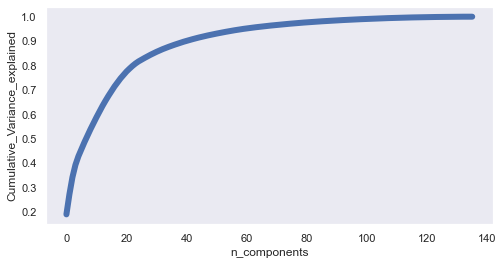

In [15]:
# plot PCA spectrum
percentage_var_explained = pca.explained_variance_ratio_;  
cum_var_explained=np.cumsum(percentage_var_explained)
plt.figure(1,figsize=(8,4))
plt.clf()  
plt.plot(cum_var_explained,linewidth=6)  
plt.axis('tight')  
plt.grid() 
plt.xlabel('n_components') 
plt.ylabel('Cumulative_Variance_explained')  
plt.show()

In [16]:
# From the graph we can see that if we take around 50 components then we can cover around 90% Variance .

In [17]:
pca = PCA(50)
new_data_pca_1  = pca.fit_transform(data_pca)

In [18]:
columns = ['pca_%i' % i for i in range(50)]
henry_pca_1 =pd. DataFrame(new_data_pca_1,columns=columns)
henry_pca_1.head()

,pca_0,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9,...,pca_40,pca_41,pca_42,pca_43,pca_44,pca_45,pca_46,pca_47,pca_48,pca_49
0,2.053319,0.481107,-2.139086,-1.963041,0.519040,0.906566,-0.675151,-1.231156,-0.364270,-0.632365,...,-0.053459,-0.305472,-0.050446,0.097171,0.319460,-0.121929,-0.054938,0.022336,-0.083295,0.008449
1,0.002843,-1.285583,1.096934,-0.074253,-0.781098,0.920701,0.034606,-0.083211,-0.407936,1.215485,...,0.752312,0.019229,0.519599,0.592182,1.195176,0.163519,0.538246,-0.698068,0.261504,-0.315508
2,2.443332,0.333469,-1.744112,-1.603331,-0.335138,-0.199331,-0.351165,0.231642,-0.740270,0.000317,...,0.025854,0.398052,-0.125192,-0.371556,0.090589,0.160259,0.217702,-0.156307,-0.307863,0.613417
3,-0.510744,1.407165,0.713854,-0.208232,-0.128932,-0.323187,2.131405,-1.489238,-1.386546,-1.828823,...,-0.137851,-0.403089,0.231927,0.112171,-0.981905,0.169338,-0.633374,0.395893,0.594108,0.277200
4,4.912260,1.338816,-0.301208,-1.575544,-0.088211,-0.230942,-0.486621,0.311029,-1.524520,0.563479,...,0.251546,0.020045,-0.171043,-0.029532,0.384537,-0.079470,-0.176276,-0.279368,-0.090341,0.162535


In [19]:
henry_pca_1.shape, target.shape

((1460, 50), (1460,))

In [20]:
# building the model and using RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt
x_train, x_val, y_train, y_val = train_test_split(henry_pca_1,target, test_size=0.25, random_state=42)

In [21]:
Ranfo = RandomForestRegressor(random_state=1)
Ranfo.fit(x_train, y_train)
# make predictions for test data and evaluate
predictions = Ranfo.predict(x_val)
print(np.sqrt(mean_squared_error(y_val,predictions )))
print(r2_score(y_val, predictions ))

0.09798349303860943
0.9013720273064713


In [22]:
data['SalePrice'] = np.exp(target)

In [23]:
data.head()

,MSZoning_FV,MSZoning_RL,Alley_None,Alley_Pave,LotShape_IR2,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MiscVal,MoSold,YrSold,SalePrice_log,SalePrice
0,0,1,1,0,0,1,0,0,1,0,...,0.351000,-0.752176,0.216503,-0.359325,-0.270208,-0.087688,-1.599111,0.138777,12.247694,208500.0
1,0,1,1,0,0,1,0,0,1,0,...,-0.060731,1.626195,-0.704483,-0.359325,-0.270208,-0.087688,-0.489110,-0.614439,12.109011,181500.0
2,0,1,1,0,0,0,0,0,1,0,...,0.631726,-0.752176,-0.070361,-0.359325,-0.270208,-0.087688,0.990891,0.138777,12.317167,223500.0
3,0,1,1,0,0,0,0,0,1,0,...,0.790804,-0.752176,-0.176048,4.092524,-0.270208,-0.087688,-1.599111,-1.367655,11.849398,140000.0
4,0,1,1,0,0,0,0,0,1,0,...,1.698485,0.780197,0.563760,-0.359325,-0.270208,-0.087688,2.100892,0.138777,12.429216,250000.0


In [24]:
df_predicted = pd.DataFrame(predictions,columns= ['predicted_SalePrice_log'])


In [25]:
df_predicted.head()

,predicted_SalePrice_log
0,11.870372
1,12.534190
2,11.643622
3,12.022989
4,12.507585


In [26]:
data = pd.concat([data,df_predicted],axis=1)

In [27]:
data.head()

,MSZoning_FV,MSZoning_RL,Alley_None,Alley_Pave,LotShape_IR2,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MiscVal,MoSold,YrSold,SalePrice_log,SalePrice,predicted_SalePrice_log
0,0,1,1,0,0,1,0,0,1,0,...,-0.752176,0.216503,-0.359325,-0.270208,-0.087688,-1.599111,0.138777,12.247694,208500.0,11.870372
1,0,1,1,0,0,1,0,0,1,0,...,1.626195,-0.704483,-0.359325,-0.270208,-0.087688,-0.489110,-0.614439,12.109011,181500.0,12.534190
2,0,1,1,0,0,0,0,0,1,0,...,-0.752176,-0.070361,-0.359325,-0.270208,-0.087688,0.990891,0.138777,12.317167,223500.0,11.643622
3,0,1,1,0,0,0,0,0,1,0,...,-0.752176,-0.176048,4.092524,-0.270208,-0.087688,-1.599111,-1.367655,11.849398,140000.0,12.022989
4,0,1,1,0,0,0,0,0,1,0,...,0.780197,0.563760,-0.359325,-0.270208,-0.087688,2.100892,0.138777,12.429216,250000.0,12.507585


In [29]:
data['predicted_SalePrice'] = np.exp(df_predicted)

In [30]:
data.head()

,MSZoning_FV,MSZoning_RL,Alley_None,Alley_Pave,LotShape_IR2,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,...,OpenPorchSF,EnclosedPorch,ScreenPorch,MiscVal,MoSold,YrSold,SalePrice_log,SalePrice,predicted_SalePrice_log,predicted_SalePrice
0,0,1,1,0,0,1,0,0,1,0,...,0.216503,-0.359325,-0.270208,-0.087688,-1.599111,0.138777,12.247694,208500.0,11.870372,142967.419170
1,0,1,1,0,0,1,0,0,1,0,...,-0.704483,-0.359325,-0.270208,-0.087688,-0.489110,-0.614439,12.109011,181500.0,12.534190,277670.253253
2,0,1,1,0,0,0,0,0,1,0,...,-0.070361,-0.359325,-0.270208,-0.087688,0.990891,0.138777,12.317167,223500.0,11.643622,113962.204957
3,0,1,1,0,0,0,0,0,1,0,...,-0.176048,4.092524,-0.270208,-0.087688,-1.599111,-1.367655,11.849398,140000.0,12.022989,166539.699220
4,0,1,1,0,0,0,0,0,1,0,...,0.563760,-0.359325,-0.270208,-0.087688,2.100892,0.138777,12.429216,250000.0,12.507585,270380.451887


In [28]:
# the PCA With 90% varince gave r2_score of 0.9000486557375974 while the final_data_combined gave r2_score of 0.9038334776248004

# In conclusion, for both the PCA & final_data_combined model performance could be improved by tuning the hyperparameters of the RandomForestRegressor

# further effort could be made to improve the performance of the PCA by selecting n_components that gave 100%

# Again, to use PCA the entire data should be used and efforts will be made to preprocessed the data ie features selection and collinearity instead of using preprocessed data from the previous study.

# Finally, this is to demostrate my understanding of comparing prediction methods using PCA and full features of the data.